In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [40]:
import glob
import scipy.ndimage
import sys

In [42]:
fns = glob.glob('/home/pmcroot/data1/2016-08-06/*focus_step_0012.npz')
fns.sort()
files = fns

In [43]:
len(fns)

157

In [36]:
fns[:20]

['/home/pmcroot/data1/2016-08-06/2016-08-06_205423_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205501_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205528_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205556_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205630_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205650_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205710_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205746_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205826_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205900_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205923_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_205947_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_210034_focus_step_0012.npz',
 '/home/pmcroot/data1/2016-08-06/2016-08-06_210111_

In [37]:
fs = np.load(fns[1])
im = fs['image']

In [50]:
im.shape

(3232, 4864)

In [51]:
x,y = (2464, 4324-120)
stamps = np.empty((len(files),3232,512),dtype='uint16')
focus = []
for k,fn in enumerate(files):
    print k,
    sys.stdout.flush()
    fs = np.load(fn)
    focus.append(fs['state'][()]['fpos'])
    stamps[k,:,:] = fs['image'][:,y-(512-128):y+128]
focus = np.array(focus)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156


In [14]:
im.shape

(3232, 4864)

In [38]:
m2 = scipy.ndimage.median_filter(im,2)

In [25]:
import PIL

In [26]:
def to_u8(data):
    data = data-data.min()
    data = data/float(data.max())
    return (data*255).astype("uint8")

In [27]:
im = PIL.Image.fromarray(to_u8(m2))
im.save('/home/pmcroot/data1/_med.png',format='png')

<IPython.core.display.Javascript object>


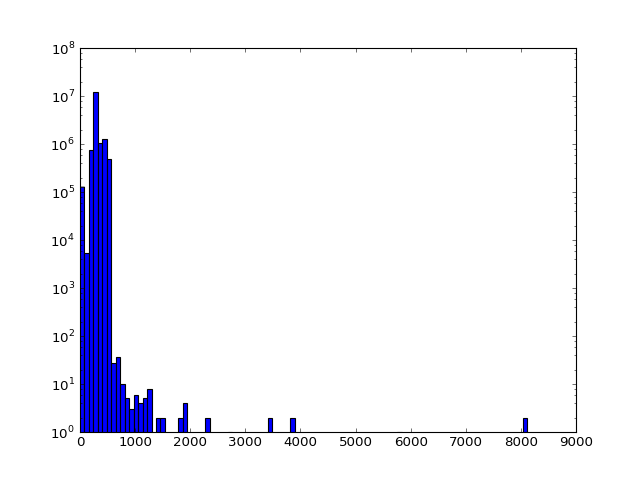

In [19]:
figure()
_=hist(m2.flatten(),bins=100,log=True)

In [20]:
np.unravel_index(m2.argmax(),m2.shape)

(2464, 4324)

<IPython.core.display.Javascript object>


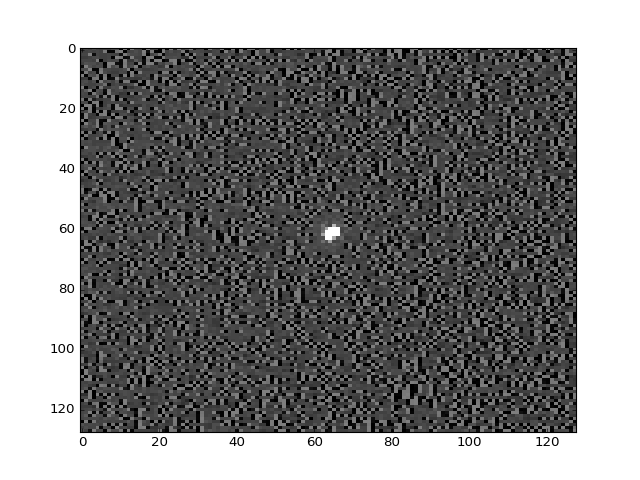

In [39]:
figure()
imshow(im[2464-64:2464+64,4324-64:4324+64],cmap=cm.gray,aspect='auto',interpolation='nearest')
clim(0,1000)

<IPython.core.display.Javascript object>


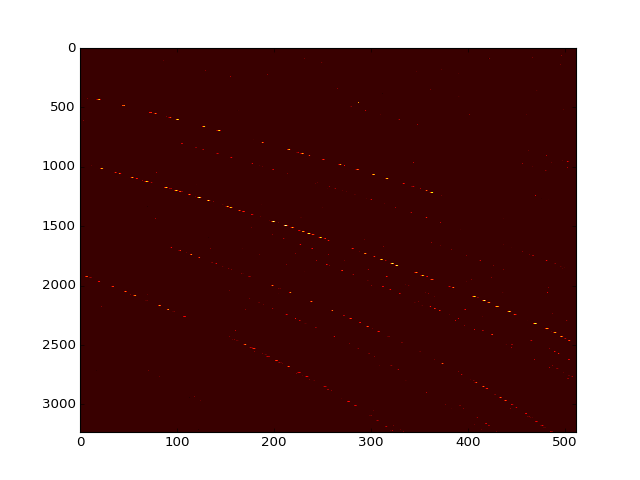

In [53]:
figure()
imshow(np.log10(stamps.max(0)),aspect='auto',cmap=cm.hot,interpolation='nearest')

In [54]:
im.shape

(3232, 4864)

In [57]:
np.max((im,im),axis=0).shape

(3232, 4864)

In [58]:
max_img = np.zeros((3232, 4864),dtype='uint16')
for k,fn in enumerate(files):
    print k,
    sys.stdout.flush()
    fs = np.load(fn)
    max_img = np.max((max_img,fs['image']),axis=0)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156


<IPython.core.display.Javascript object>


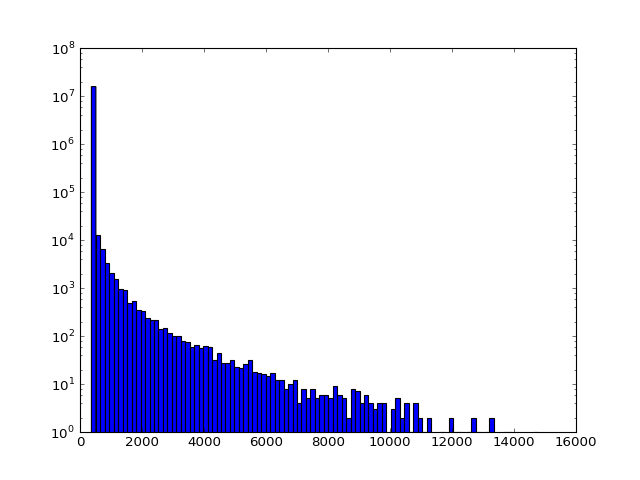

In [63]:
figure()
_=hist(max_img.flatten(),bins=100,log=True)

<IPython.core.display.Javascript object>


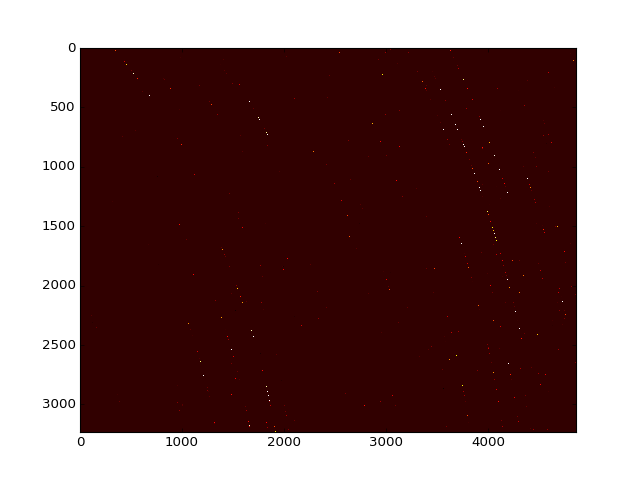

In [69]:
figure()
imshow((max_img),aspect='auto',cmap=cm.hot,interpolation='nearest')
clim(400,2000)

In [70]:
import time

In [80]:
(time.mktime((2016,8,7,4,0,0,0,0,1))-time.time())/3600.

5.262730573349529

In [77]:
time.asctime((2016,8,7,4,0,0,0,0,1))

'Mon Aug  7 04:00:00 2016'